# Цель проекта
Нам предстоит выяснить, от каких самых малоприбыльных рейсов из Анапы мы можем отказаться в зимнее время. 

Мой подготовленный датасет из SQL состоит из:

 - flight_id - id рейса
 - flight_no - номер рейса
 - departure_city - город вылета (Анапа)
 - arrival_city - город прилета
 - actual_departure - фактическое время отправления
 - actual_arrival - фактическое время прибытия
 - flight_time - время полета в минутах
 - late_departure - на сколько минут опоздал вылет рейса
 - model - модель самолёта
 - aircraft_code - код самолета
 - economy_seat - количество мест в эконом-классе
 - business_seat - количество мест в бизнес-классе
 - total_seat - общее количество мест
 - economy_sold - количество проданных билетов в эконом-класс
 - business_sold - количество проданных билетов в бизнес-класс
 - total_sold - общее количество проданных билетов
 - economy_amount - выручка от продаж билетов в эконом-класс
 - business_amount - выручка от продаж билетов в бизнес-класс
 - total_amount - общая выручка от продаж билетов

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)
flights = pd.read_csv('flight.csv')

In [2]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   flight_id         193 non-null    int64  
 1   flight_no         193 non-null    object 
 2   departure_city    193 non-null    object 
 3   arrival_city      193 non-null    object 
 4   actual_departure  193 non-null    object 
 5   actual_arrival    193 non-null    object 
 6   flight_time       193 non-null    float64
 7   late_departure    193 non-null    float64
 8   model             193 non-null    object 
 9   aircraft_code     193 non-null    object 
 10  economy_seat      193 non-null    int64  
 11  business_seat     193 non-null    int64  
 12  total_seat        193 non-null    int64  
 13  economy_sold      180 non-null    float64
 14  business_sold     180 non-null    float64
 15  total_sold        180 non-null    float64
 16  economy_amount    180 non-null    float64
 1

Есть рейсы, в которых отсутствует информация о продажах билетов. А значит остальная информация по ним просто бесполезна. Удалим такие рейсы.

In [3]:
flights.dropna(inplace=True)
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 192
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   flight_id         180 non-null    int64  
 1   flight_no         180 non-null    object 
 2   departure_city    180 non-null    object 
 3   arrival_city      180 non-null    object 
 4   actual_departure  180 non-null    object 
 5   actual_arrival    180 non-null    object 
 6   flight_time       180 non-null    float64
 7   late_departure    180 non-null    float64
 8   model             180 non-null    object 
 9   aircraft_code     180 non-null    object 
 10  economy_seat      180 non-null    int64  
 11  business_seat     180 non-null    int64  
 12  total_seat        180 non-null    int64  
 13  economy_sold      180 non-null    float64
 14  business_sold     180 non-null    float64
 15  total_sold        180 non-null    float64
 16  economy_amount    180 non-null    float64
 1

In [4]:
flights.sample(5)

,flight_id,flight_no,departure_city,arrival_city,actual_departure,actual_arrival,flight_time,late_departure,model,aircraft_code,economy_seat,business_seat,total_seat,economy_sold,business_sold,total_sold,economy_amount,business_amount,total_amount
52,136397,PG0252,Anapa,Moscow,2016-12-25T10:06:00Z,2016-12-25T11:47:00Z,101.0,1.0,Boeing 737-300,733,118,12,130,97.0,7.0,104.0,1188200.0,256200.0,1444400.0
156,136861,PG0480,Anapa,Belgorod,2017-02-12T09:28:00Z,2017-02-12T10:17:00Z,49.0,3.0,Sukhoi Superjet-100,SU9,85,12,97,76.0,11.0,87.0,481200.0,207900.0,689100.0
42,136252,PG0252,Anapa,Moscow,2016-12-20T10:05:00Z,2016-12-20T11:46:00Z,101.0,0.0,Boeing 737-300,733,118,12,130,91.0,11.0,102.0,1115000.0,402600.0,1517600.0
188,136953,PG0480,Anapa,Belgorod,2017-02-27T09:27:00Z,2017-02-27T10:17:00Z,50.0,2.0,Sukhoi Superjet-100,SU9,85,12,97,85.0,12.0,97.0,538500.0,226800.0,765300.0
97,136172,PG0252,Anapa,Moscow,2017-01-15T10:05:00Z,2017-01-15T11:44:00Z,99.0,0.0,Boeing 737-300,733,118,12,130,99.0,11.0,110.0,1215000.0,402600.0,1617600.0


In [5]:
# Какие самолеты куда летают
flights.groupby(by=['arrival_city', 'model']).flight_id.count()

arrival_city  model              
Belgorod      Sukhoi Superjet-100    90
Moscow        Boeing 737-300         90
Name: flight_id, dtype: int64

Получается, что в Москву летает Boeing 737-300, а в Белгород - Sukhoi Superjet-100. Вместимость у самолётов разная, дистанция разная, характеристики самолетов разные значит и выручка за рейс ожидаемо разная.

Рассчитаем расход топлива и затраты на топливо на перелет.

Расход топлива за 1 час полета в кг: http://newsruss.ru/doc/index.php/%D0%A0%D0%B0%D1%81%D1%85%D0%BE%D0%B4_%D1%82%D0%BE%D0%BF%D0%BB%D0%B8%D0%B2%D0%B0_%D1%81%D0%B0%D0%BC%D0%BE%D0%BB%D0%B5%D1%82%D0%B0

Цены на ГСМ в Анапе на 2016-2017 гг.:
https://favt.gov.ru/dejatelnost-ajeroporty-i-ajerodromy-ceny-na-aviagsm/

In [6]:
fuel_consumption = {'SU9': 1.7, '733': 2.4}
# стоимость топлива за 1000 кг
fuel_cost = {12: 38867, 1: 41435, 2: 39553}

In [7]:
flights['fuel_consumption'] = flights['aircraft_code'].map(fuel_consumption)
flights['Month'] = flights['actual_departure'].apply(
    lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ').month)
flights['fuel_cost'] = flights['Month'].map(fuel_cost)
flights['flight_costs'] = round(
    (flights['flight_time']/60)*flights['fuel_consumption']*flights['fuel_cost'])
flights['profit'] = flights['total_amount'] - flights['flight_costs']

Посмотрим на распределение прибыли по направлениям

In [8]:
amount_stat = flights.groupby('arrival_city').total_amount.agg(['min', 'mean', 'max']).astype('int64').reset_index()

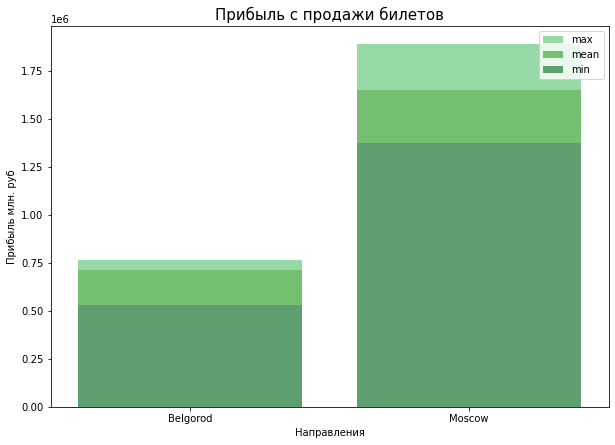

In [9]:
fig, ax = plt.subplots(figsize=(10,7))
sns.set_color_codes('pastel')
sns.barplot(x='arrival_city', y='max', data=amount_stat,color = 'g', label = 'max')
sns.set_color_codes('muted')
sns.barplot(x='arrival_city', y='mean', data=amount_stat, color = 'g', label = 'mean')
sns.set_color_codes('deep')
sns.barplot(x='arrival_city', y='min', data=amount_stat, color = 'g', label = 'min')
ax.legend(loc = 1)
plt.ylabel(None)
ax.set_title('Прибыль с продажи билетов',fontsize= 15)
ax.set_xlabel('Направления')
ax.set_ylabel('Прибыль млн. руб');

Как видим по графикам относительная прибыль сильно различается в зависимости от направления. Это и неудивительно, ведь рейс в Москву выполняется в два раза дольше, чем в Белгород. Далее рассмотрим зависимость заполненности самолета от дня недели.

In [10]:
# Добавим призак дня недели, в котором совершался полет: weekday.
flights['actual_arrival'] = pd.to_datetime(flights['actual_arrival'])
flights.loc[:, 'weekday'] = flights['actual_arrival'].apply(lambda x: x.weekday() + 1)
weekday = {1:'ПН', 2: 'ВТ', 3: 'СР', 4: 'ЧТ', 5: 'ПТ', 6: 'СБ', 7: 'ВС'}
flights['weekday'] = flights['weekday'].map(weekday)

In [11]:
# Добавим признак: perc_occupied - доля занятых мест
flights['percent_seat'] = round(flights['total_sold']/flights['total_seat'], 2)
flights.sample(5)

,flight_id,flight_no,departure_city,arrival_city,actual_departure,actual_arrival,flight_time,late_departure,model,aircraft_code,economy_seat,business_seat,total_seat,economy_sold,business_sold,total_sold,economy_amount,business_amount,total_amount,fuel_consumption,Month,fuel_cost,flight_costs,profit,weekday,percent_seat
27,136223,PG0252,Anapa,Moscow,2016-12-13T10:06:00Z,2016-12-13 11:47:00+00:00,101.0,1.0,Boeing 737-300,733,118,12,130,110.0,11.0,121.0,1349200.0,402600.0,1751800.0,2.4,12,38867,157023.0,1594777.0,ВТ,0.93
144,136322,PG0252,Anapa,Moscow,2017-02-06T10:11:00Z,2017-02-06 11:52:00+00:00,101.0,6.0,Boeing 737-300,733,118,12,130,98.0,10.0,108.0,1201600.0,366000.0,1567600.0,2.4,2,39553,159794.0,1407806.0,ПН,0.83
143,136754,PG0480,Anapa,Belgorod,2017-02-06T09:29:00Z,2017-02-06 10:18:00+00:00,49.0,4.0,Sukhoi Superjet-100,SU9,85,12,97,78.0,12.0,90.0,494400.0,226800.0,721200.0,1.7,2,39553,54913.0,666287.0,ПН,0.93
162,136249,PG0252,Anapa,Moscow,2017-02-14T10:08:00Z,2017-02-14 11:46:00+00:00,98.0,3.0,Boeing 737-300,733,118,12,130,111.0,12.0,123.0,1361400.0,439200.0,1800600.0,2.4,2,39553,155048.0,1645552.0,ВТ,0.95
114,136293,PG0252,Anapa,Moscow,2017-01-23T10:09:00Z,2017-01-23 11:48:00+00:00,99.0,4.0,Boeing 737-300,733,118,12,130,102.0,12.0,114.0,1250400.0,439200.0,1689600.0,2.4,1,41435,164083.0,1525517.0,ПН,0.88


In [12]:
# Посчитаем средние по дням недели в разрезе городов прилета
moscow = flights.query('arrival_city == "Moscow"').groupby('weekday').mean()
belgorod = flights.query('arrival_city == "Belgorod"').groupby('weekday').mean()
# su_other_means = flights.query('aircraft_code == "SU9"').groupby('weekday').mean()
# boeing_other_means = flights.query('aircraft_code == "733"').groupby('weekday').mean()

[Text(0.5, 0, 'День недели'),
 Text(0, 0.5, 'Заполненность самолетов в Белгород')]

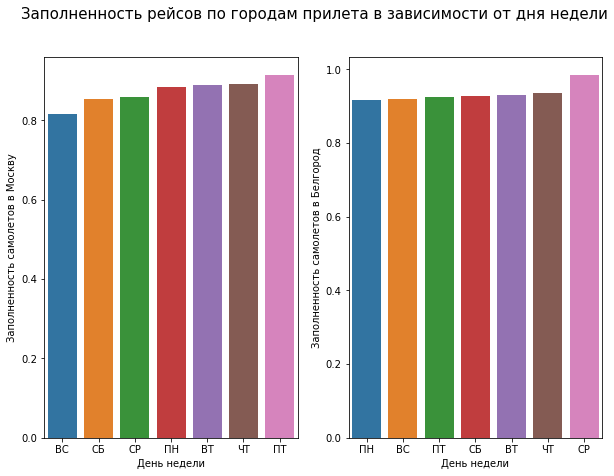

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10, 7))
fig.suptitle(
    'Заполненность рейсов по городам прилета в зависимости от дня недели', fontsize=15)
sns.barplot(data=moscow, y='percent_seat', x=moscow.index,
            order=moscow.sort_values(by='percent_seat').index, ax=ax[0])
sns.barplot(data=belgorod, y='percent_seat', x=belgorod.index,
            order=belgorod.sort_values(by='percent_seat').index, ax=ax[1])
ax[0].set(xlabel='День недели', ylabel='Заполненность самолетов в Москву')
ax[1].set(xlabel='День недели', ylabel='Заполненность самолетов в Белгород')

По гистограммам можно увидеть, что рейсы в Белгород в среднем заполнены на 90%. Только по средам заполняемость больше на 3-4%. Заполняемость по рейсам в Москву немного хуже. По воскресеньям, субботам и средам загруженность самолета менее 90%. Посмотрим рейсы, которые были загружены менее 75%.

In [14]:
flights[flights.percent_seat < 0.75]

,flight_id,flight_no,departure_city,arrival_city,actual_departure,actual_arrival,flight_time,late_departure,model,aircraft_code,economy_seat,business_seat,total_seat,economy_sold,business_sold,total_sold,economy_amount,business_amount,total_amount,fuel_consumption,Month,fuel_cost,flight_costs,profit,weekday,percent_seat
20,136352,PG0252,Anapa,Moscow,2016-12-10T10:10:00Z,2016-12-10 11:50:00+00:00,100.0,5.0,Boeing 737-300,733,118,12,130,82.0,10.0,92.0,1006400.0,366000.0,1372400.0,2.4,12,38867,155468.0,1216932.0,СБ,0.71
50,136253,PG0252,Anapa,Moscow,2016-12-24T10:08:00Z,2016-12-24 11:46:00+00:00,98.0,3.0,Boeing 737-300,733,118,12,130,82.0,11.0,93.0,1005200.0,402600.0,1407800.0,2.4,12,38867,152359.0,1255441.0,СБ,0.72
128,136642,PG0480,Anapa,Belgorod,2017-01-30T09:28:00Z,2017-01-30 10:17:00+00:00,49.0,3.0,Sukhoi Superjet-100,SU9,85,12,97,54.0,10.0,64.0,342000.0,189000.0,531000.0,1.7,1,41435,57526.0,473474.0,ПН,0.66
180,136807,PG0480,Anapa,Belgorod,2017-02-23T09:28:00Z,2017-02-23 10:18:00+00:00,50.0,3.0,Sukhoi Superjet-100,SU9,85,12,97,60.0,8.0,68.0,379800.0,151200.0,531000.0,1.7,2,39553,56033.0,474967.0,ЧТ,0.70


За три зимних месяца мы видим всего 4 рейса с низкой загруженностью самолета. Причем 2 рейса выполнялись в Москву и не в воскресенье, а в субботу. Посмотрим на все рейсы в Москву по воскресеньям.

[Text(0.5, 0, 'Дата рейса'), Text(0, 0.5, 'Доля занятых мест')]

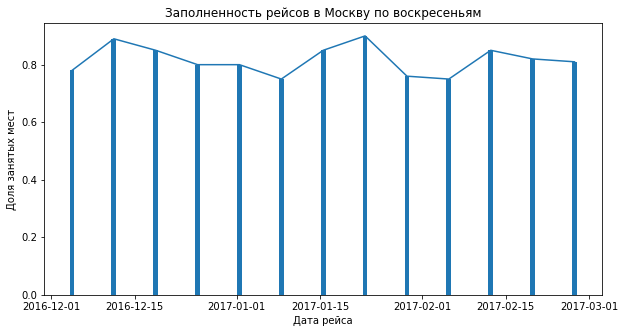

In [15]:
moscow_sunday = flights[(flights.weekday == 'ВС')&(flights.arrival_city == 'Moscow')]
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(moscow_sunday.actual_arrival, moscow_sunday.percent_seat)
ax.plot(moscow_sunday.actual_arrival, moscow_sunday.percent_seat)
ax.set_title('Заполненность рейсов в Москву по воскресеньям')
ax.set(xlabel = 'Дата рейса', ylabel = 'Доля занятых мест')

По данному графику видим, что самолеты, которые летят в Москву по воскресеньям, загружены менее чем на 90%.

# Выводы

С точки зрения анализа выручки оба города показывают себя неплохо. Заполненность неплохая во все дни. При этом московские рейсы в воскресенье менее выгодны по сравнению с другими днями недели. Мы знаем что в Белгород летают только самолеты Sukhoi Superjet-100, а в Москву - Boeing 737-300. И поскольку это разные самолеты - мы не можем сказать точно какой рейс выгоднее, т.к. мы не знаем сколько обходится в обслуживании каждый из этих самолетов. Не зная других параметров затрат на полеты, при довольно условном анализе прибыльности получается, что рейсы в Белгород гораздо менее прибыльны, чем рейсы в Москву.

## Рекомендации
 1. Можно попробовать поменять самолеты на воскресные дни: Боинг отправить в Белгород, Сухой-Суперджет в Москву. Если есть другие менее затратные свободные самолеты с вместимостью 100-110 человек, поставить такие самолеты на рейсы в Москву по воскресеньям.
 2. Продумать маркетинговые акции по привлечению пассажиров на рейсы в Москву по воскресеньям.